In [68]:
%pip install yellowbrick
%pip install tensorflow
%pip install keras
%pip install nltk
%pip install seaborn
%pip install umap-learn
%pip install scikit-learn
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [69]:
#Importing the Libraries
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import numpy as np
import pandas as pd
import nltk

In [70]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("whenamancodes/customer-personality-analysis")

print("Path to dataset files:", path)

Path to dataset files: /Users/shreyavats/.cache/kagglehub/datasets/whenamancodes/customer-personality-analysis/versions/1


In [71]:
#Loading the dataset
df = pd.read_csv(path + "/marketing_campaign.csv", sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [72]:
#Information on features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [73]:
#To remove the NA values
df = df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))
df.describe()

The total number of data-points after removing the rows with missing values are: 2216


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [74]:
# missing values
df.isna().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [75]:
#drop columns that are not required for analysis
df = df.drop(columns=['Z_CostContact', 'Z_Revenue', 'ID', 'Dt_Customer'])

In [76]:
df.describe().round(2)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,...,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00
mean,1968.82,52247.25,0.44,0.51,49.01,305.09,26.36,167.00,37.64,27.03,...,2.67,5.80,5.32,0.07,0.07,0.07,0.06,0.01,0.01,0.15
std,11.99,25173.08,0.54,0.54,28.95,337.33,39.79,224.28,54.75,41.07,...,2.93,3.25,2.43,0.26,0.26,0.26,0.24,0.12,0.10,0.36
min,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1959.00,35303.00,0.00,0.00,24.00,24.00,2.00,16.00,3.00,1.00,...,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1970.00,51381.50,0.00,0.00,49.00,174.50,8.00,68.00,12.00,8.00,...,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1977.00,68522.00,1.00,1.00,74.00,505.00,33.00,232.25,50.00,33.00,...,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,262.00,...,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [77]:
# convert categorical variables to numerical for correlation analysis
data = df.copy()

# mapping dictionaries
edu_map = {
    'Basic': 1, 
    '2n Cycle': 2, 
    'Graduation': 3,
    'Master': 4, 
    'PhD': 5
}
marital_map = {
    'Single': 1,
    'Married': 2,
    'Divorced': 3,
    'Widow': 4,
    'Alone': 5,
    'Absurd': 6,
    'YOLO': 7,
    'Together': 8   
}

# map categorical values
data['Education'] = data['Education'].map(edu_map)
data['Marital_Status'] = data['Marital_Status'].map(marital_map)

data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,3,1,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,3,1,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,3,8,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,3,8,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,5,2,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,3,2,61223.0,0,1,46,709,43,182,...,3,4,5,0,0,0,0,0,0,0
2236,1946,5,8,64014.0,2,1,56,406,0,30,...,2,5,7,0,0,0,1,0,0,0
2237,1981,3,3,56981.0,0,0,91,908,48,217,...,3,13,6,0,1,0,0,0,0,0
2238,1956,4,8,69245.0,0,1,8,428,30,214,...,5,10,3,0,0,0,0,0,0,0


In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = pd.DataFrame(
    scaler.fit_transform(data),
    columns=data.columns
)
normalized_data


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0.621359,0.50,0.000000,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,...,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.592233,0.50,0.000000,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,...,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.699029,0.50,1.000000,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,...,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.883495,0.50,1.000000,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,...,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.854369,1.00,0.142857,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,...,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.718447,0.50,0.142857,0.089472,0.0,0.5,0.464646,0.474883,0.216080,0.105507,...,0.107143,0.307692,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2212,0.514563,1.00,1.000000,0.093669,1.0,0.5,0.565657,0.271936,0.000000,0.017391,...,0.071429,0.384615,0.35,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2213,0.854369,0.50,0.285714,0.083092,0.0,0.0,0.919192,0.608171,0.241206,0.125797,...,0.107143,1.000000,0.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2214,0.611650,0.75,1.000000,0.101536,0.0,0.5,0.080808,0.286671,0.150754,0.124058,...,0.178571,0.769231,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**1. Unsupervised Feature Selection**

These methods remove irrelevant or redundant features without using class labels — they rely on intrinsic structure of the data (e.g., variance, similarity, clustering).

**1.Variance Threshold**

A feature selection method that removes features with low variance, which are assumed to contain little information. Features with nearly constant values across samples are removed to reduce dimensionality, decrease computational cost, and minimize noise. It is a simple and effective filtering technique because it only requires the input features (\(X\)), not the target variable (\(y\)). 

In [79]:
#variance ranking of features
#Compute variance of all features
variance = normalized_data.var()

#Rank variance from highest to lowest
variance_ranked = variance.sort_values(ascending=False)

#Build a DataFrame to display variance ranking
variance_ranked_df = variance_ranked.reset_index()
variance_ranked_df.columns = ["Feature", "Variance"]
variance_ranked_df["Rank"] = variance_ranked_df["Variance"].rank(ascending=False)
variance_ranked_df

,Feature,Variance,Rank
0,Marital_Status,0.152897,1.0
1,Response,0.127747,2.0
2,Recency,0.085502,3.0
3,Teenhome,0.074033,4.0
4,Kidhome,0.072064,5.0
5,AcceptedCmp4,0.068561,6.0
6,AcceptedCmp3,0.068176,7.0
7,AcceptedCmp5,0.067791,8.0
8,Education,0.063105,9.0
9,NumStorePurchases,0.062530,10.0


**Using correlation threshold: |corr| ≥ 0.02 for this dataset**

This keeps the strong product-spending block and customer behavior patterns while removing variables that contribute little or no signal.

In [80]:
#Step 1 — Import + Create selector
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.02)

In [81]:
#Step 2 — Fit & Transform the Data
X_reduced = selector.fit_transform(normalized_data)

In [82]:
# Get names of features removed by VarianceThreshold
selected_features = normalized_data.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumStorePurchases', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'Response'],
      dtype='object')


In [83]:
#reduced data after variance thresholding
removed_features = normalized_data.columns[~selector.get_support()]
print("Removed features:", removed_features)

Removed features: Index(['Year_Birth', 'Income', 'MntMeatProducts', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth',
       'AcceptedCmp2', 'Complain'],
      dtype='object')


In [84]:
#Step 5 — Build a reduced DataFrame
varience_thresholded_df = normalized_data[selected_features]
varience_thresholded_df

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Response
0,0.50,0.000000,0.0,0.0,0.585859,0.425318,0.442211,0.664093,0.335878,0.274143,0.307692,0.0,0.0,0.0,0.0,1.0
1,0.50,0.000000,0.5,0.5,0.383838,0.007368,0.005025,0.007722,0.003817,0.018692,0.153846,0.0,0.0,0.0,0.0,0.0
2,0.50,1.000000,0.0,0.0,0.262626,0.285332,0.246231,0.428571,0.080153,0.130841,0.769231,0.0,0.0,0.0,0.0,0.0
3,0.50,1.000000,0.5,0.0,0.262626,0.007368,0.020101,0.038610,0.011450,0.015576,0.307692,0.0,0.0,0.0,0.0,0.0
4,1.00,0.142857,0.5,0.0,0.949495,0.115874,0.216080,0.177606,0.103053,0.046729,0.461538,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.50,0.142857,0.0,0.5,0.464646,0.474883,0.216080,0.162162,0.450382,0.769470,0.307692,0.0,0.0,0.0,0.0,0.0
2212,1.00,1.000000,1.0,0.5,0.565657,0.271936,0.000000,0.000000,0.000000,0.024922,0.384615,0.0,0.0,0.0,1.0,0.0
2213,0.50,0.285714,0.0,0.0,0.919192,0.608171,0.241206,0.123552,0.045802,0.074766,1.000000,0.0,1.0,0.0,0.0,0.0
2214,0.75,1.000000,0.0,0.5,0.080808,0.286671,0.150754,0.308880,0.114504,0.190031,0.769231,0.0,0.0,0.0,0.0,0.0


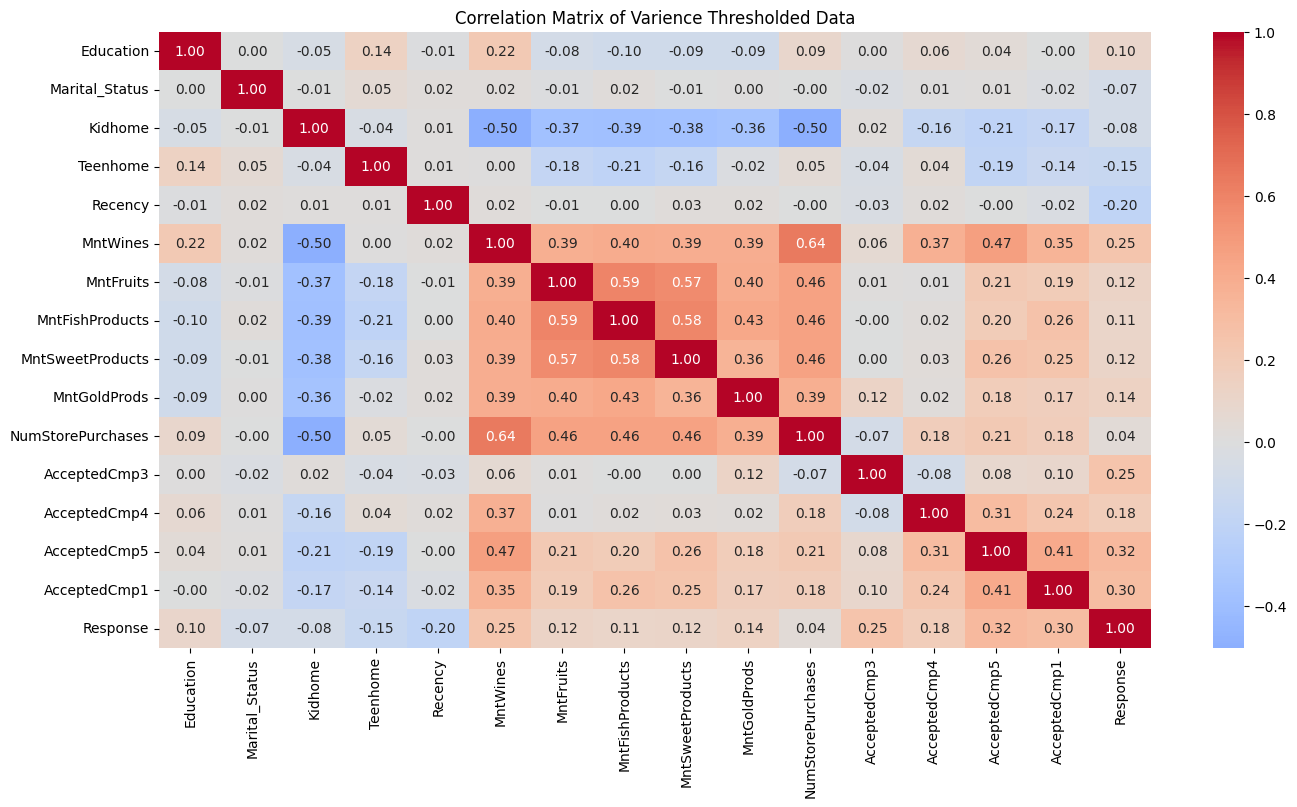

In [85]:
#correlation matrix of normalized reduced data
corr_reduced = varience_thresholded_df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_reduced, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Varience Thresholded Data")
plt.show()

**2.Correlation-based Filtering**


It is a pre-processing technique that uses correlation to select the most relevant features from a high-dimensional dataset.It removes irrelevant or redundant features without using a labeled target variable, making it computationally efficient and applicable to problems without prior knowledge of classes. 

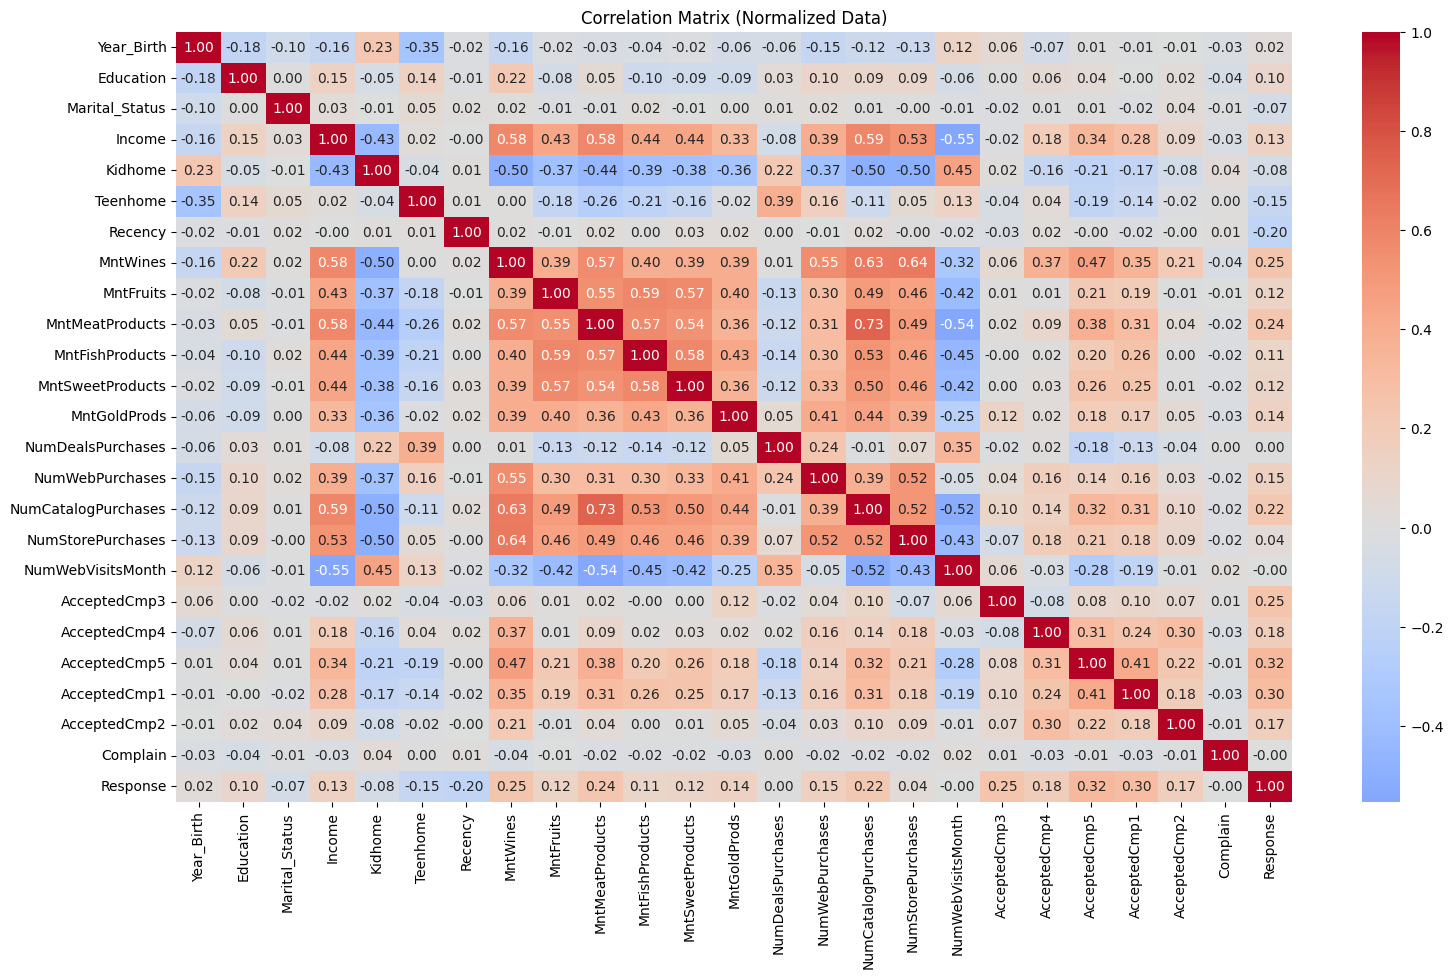

In [86]:
# 1) Compute absolute correlation matrix
corr = normalized_data.corr()

# visualize
plt.figure(figsize=(18, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix (Normalized Data)")
plt.show()

In [87]:
#find threshold of each correlated feature pair and give me a list of features with their threshold values
def find_correlated_features(corr_matrix, threshold):
    correlated_pairs = []
    to_drop = set()
    
    # Iterate through the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                feature_pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
                correlated_pairs.append(feature_pair)
                to_drop.add(corr_matrix.columns[i])  # Mark one feature for removal
    
    return correlated_pairs, list(to_drop)
# Apply the function with a threshold of 0.2
correlated_pairs_1, to_drop_1 = find_correlated_features(corr, threshold=0.2)
print("Correlated feature pairs (threshold > 0.2):")

correlated_pairs_1



Correlated feature pairs (threshold > 0.2):


[('Kidhome', 'Year_Birth', np.float64(0.23361461678438086)),
 ('Kidhome', 'Income', np.float64(-0.42866900796918567)),
 ('Teenhome', 'Year_Birth', np.float64(-0.3507905725086734)),
 ('MntWines', 'Education', np.float64(0.21503674140544887)),
 ('MntWines', 'Income', np.float64(0.5786497501367381)),
 ('MntWines', 'Kidhome', np.float64(-0.4973358580482486)),
 ('MntFruits', 'Income', np.float64(0.4308416809908742)),
 ('MntFruits', 'Kidhome', np.float64(-0.37339610186454736)),
 ('MntFruits', 'MntWines', np.float64(0.3870238608948813)),
 ('MntMeatProducts', 'Income', np.float64(0.5846333567663226)),
 ('MntMeatProducts', 'Kidhome', np.float64(-0.43926052933025017)),
 ('MntMeatProducts', 'Teenhome', np.float64(-0.2611223852337335)),
 ('MntMeatProducts', 'MntWines', np.float64(0.5688600028034906)),
 ('MntMeatProducts', 'MntFruits', np.float64(0.5478221664444232)),
 ('MntFishProducts', 'Income', np.float64(0.43887135945164035)),
 ('MntFishProducts', 'Kidhome', np.float64(-0.3888842203052563)),
 

In [88]:
#choosing threshold and getting columns to drop
threshold_1 = 0.2
# Get upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Find features with correlation greater than the threshold_1
to_drop = [
    col for col in upper.columns
    if any(upper[col] > threshold_1)
]
print("Highly correlated features to drop:")
to_drop

Highly correlated features to drop:


['Kidhome',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']

In [89]:
corr_filtered_data = normalized_data.drop(columns=to_drop)

print("Original shape:", normalized_data.shape)
print("After correlation filtering:", corr_filtered_data.shape) 

Original shape: (2216, 25)
After correlation filtering: (2216, 8)


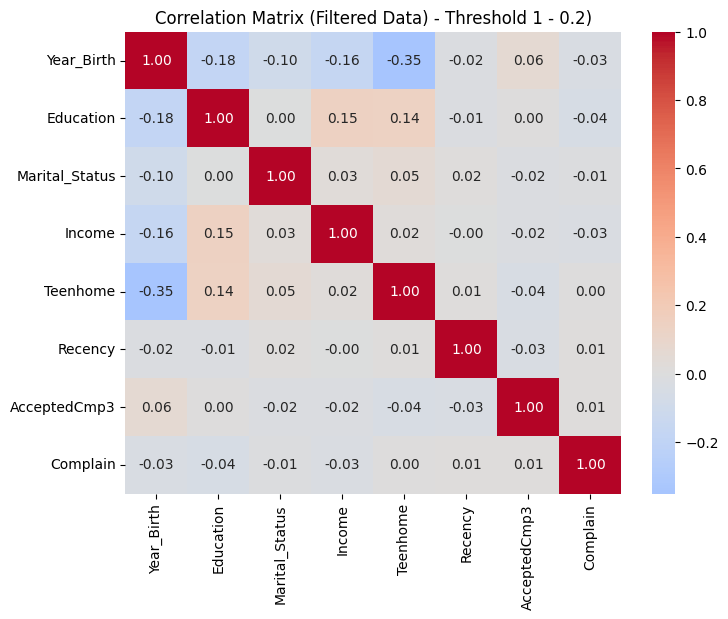

In [90]:
#coorrelation matrix of threshold 1 filtered data
corr_filtered_1 = corr_filtered_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_filtered_1, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix (Filtered Data) - Threshold 1 - 0.2)")
plt.show()

In [91]:
#choosing threshold and getting columns to drop
threshold_2 = 0.5
# Get upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Find features with correlation greater than the threshold_2
to_drop = [
    col for col in upper.columns
    if any(upper[col] > threshold_2)
]

print("Highly correlated features to drop:")
to_drop

Highly correlated features to drop:


['MntWines',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases']

In [92]:
corr_filtered_data_2 = normalized_data.drop(columns=to_drop)

print("Original shape:", normalized_data.shape)
print("After correlation filtering:", corr_filtered_data_2.shape) 

Original shape: (2216, 25)
After correlation filtering: (2216, 18)


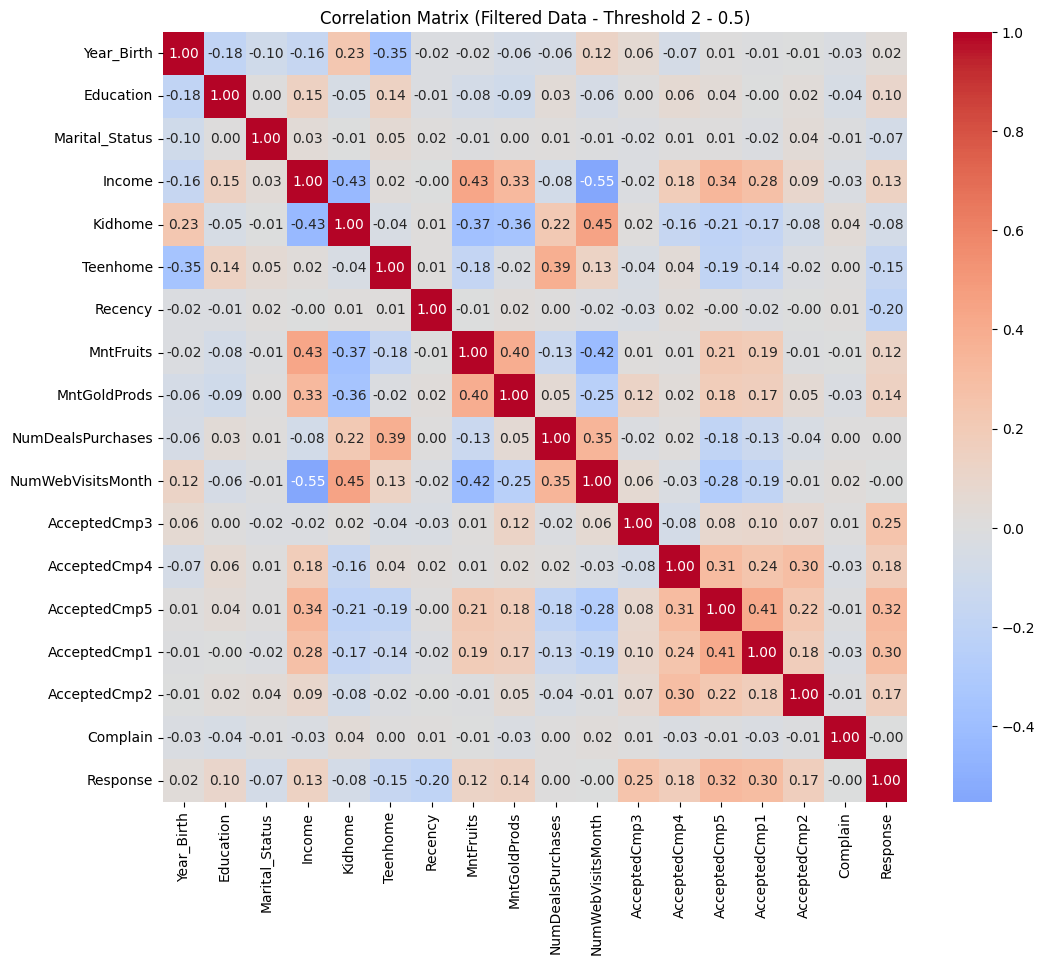

In [93]:
#coorrelation matrix of threshold 2 filtered data
corr_filtered_2 = corr_filtered_data_2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_filtered_2, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix (Filtered Data - Threshold 2 - 0.5)")
plt.show()

In [94]:
#choosing threshold and getting columns to drop
threshold_3 = 0.7
# Get upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Find features with correlation greater than the threshold_3
to_drop = [
    col for col in upper.columns
    if any(upper[col] > threshold_3)
]

print("Highly correlated features to drop:")
to_drop

Highly correlated features to drop:


['NumCatalogPurchases']

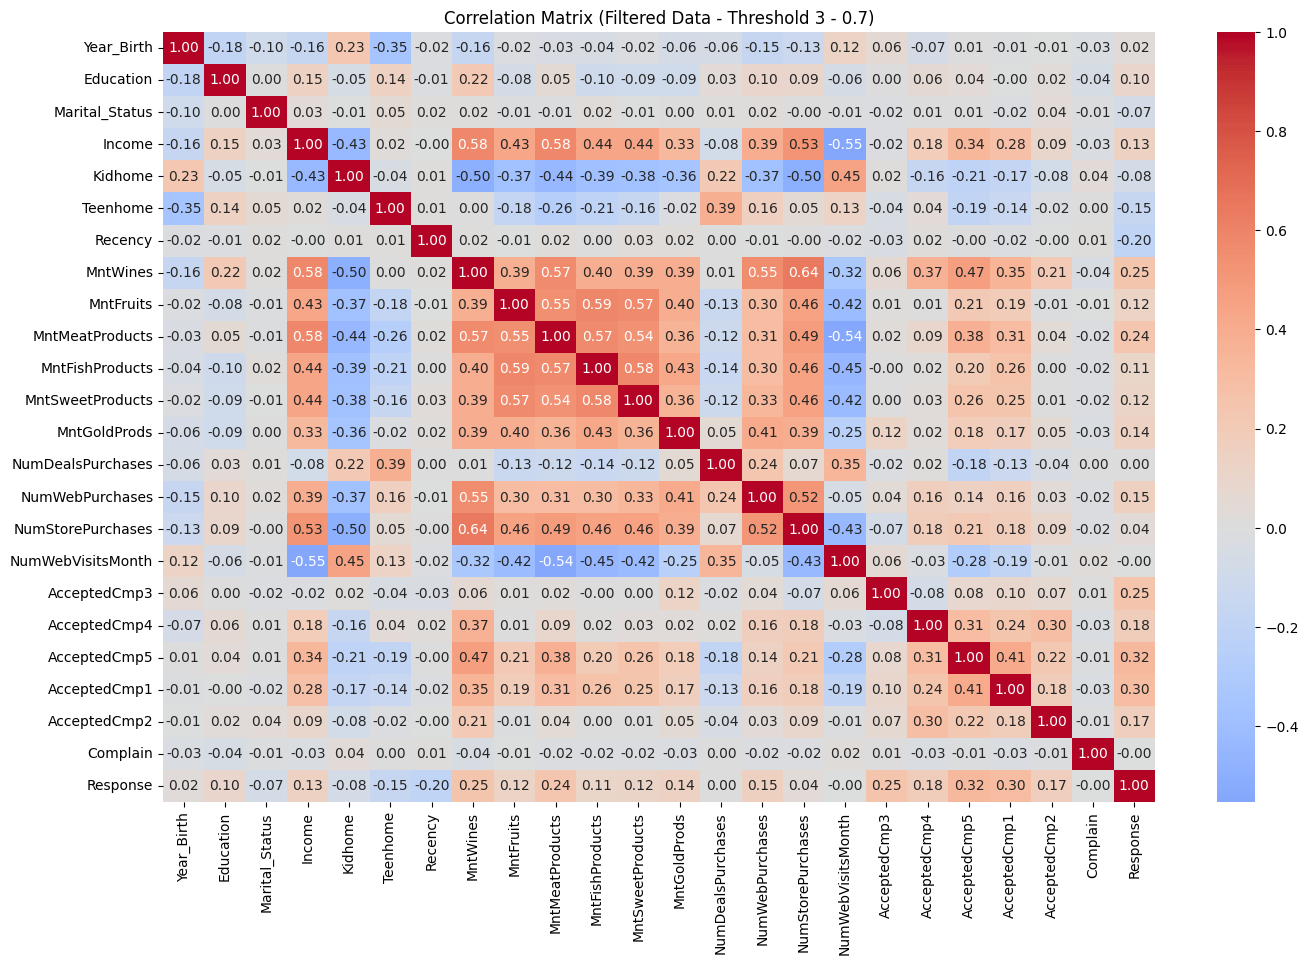

In [95]:
#correlation matrix threshold 3 filtered data
corr_filtered_data_3 = normalized_data.drop(columns=to_drop)    
corr_filtered_3 = corr_filtered_data_3.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_filtered_3, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix (Filtered Data - Threshold 3 - 0.7)")
plt.show()

In [96]:
corr_filtered_data_3 = normalized_data.drop(columns=to_drop)

print("Original shape:", normalized_data.shape)
print("After correlation filtering:", corr_filtered_data_3.shape) 

Original shape: (2216, 25)
After correlation filtering: (2216, 24)


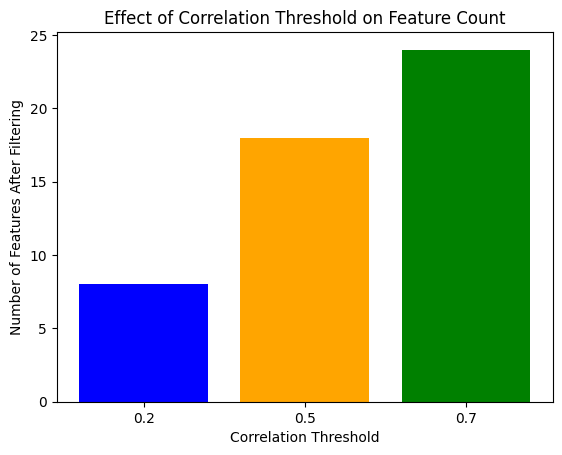

In [97]:
#comparison bar plot of different correlation thresholds
import matplotlib.pyplot as plt
thresholds = ['0.2', '0.5', '0.7']
shapes = [corr_filtered_data.shape[1],
          corr_filtered_data_2.shape[1],
          corr_filtered_data_3.shape[1]]    
plt.bar(thresholds, shapes, color=['blue', 'orange', 'green'])
plt.xlabel('Correlation Threshold')
plt.ylabel('Number of Features After Filtering')
plt.title('Effect of Correlation Threshold on Feature Count')
plt.show()

**Autoencoder-based Reduction**

An autoencoder is a neural network that tries to reconstruct its input.

- Encoder: compresses input x into a lower-dimensional vector z (the bottleneck).

- Decoder: reconstructs x from z.

For dimensionality reduction, we care about z:

The encoded vector is your reduced feature representation.

**2. Feature Extraction (Transformation-based Unsupervised Reduction)**

Instead of directly removing features, these transform them into a smaller set of new features.

**PCA (Principal Component Analysis)**



In [98]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(normalized_data)


,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [99]:
#Cumulative explained variance ratio
explained = np.cumsum(pca.explained_variance_ratio_)
explained

array([0.20773282, 0.3410423 , 0.45569254, 0.53776394, 0.61071734,
       0.67271209, 0.7220393 , 0.76735786, 0.80459769, 0.83820119,
       0.86950957, 0.89251775, 0.90852513, 0.92251113, 0.93491628,
       0.94525982, 0.95510073, 0.96466596, 0.9732655 , 0.9815463 ,
       0.98913259, 0.9933324 , 0.99705947, 0.99946956, 1.        ])

**Why 9 components?**

Because:

✔ They capture 80.46% of the total variance

This is the standard PCA requirement in feature selection and dimensionality reduction.

✔ They remove noise

Everything after PC9 contributes very little and increases dimensionality without adding meaning.

✔ They encode all major customer behavior patterns

From your cumulative variance curve, PCs 1–9 capture:

Spending behavior

Purchase channels

Family structure

Marketing response

Recency + activity

Various medium-strength demographic effects

After PC9, the curve becomes flat → only noise and tiny variances remain.

In [100]:
#Initiating PCA to reduce dimensions to 9
pca = PCA(n_components=9)
X_pca = pca.fit_transform(normalized_data)
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(9)])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.762734,-0.473707,0.067374,-0.307484,-0.149870,0.251686,0.136320,-0.637182,-0.103076
1,-0.525426,-0.367573,-0.084266,0.120313,-0.033754,-0.105788,-0.155192,0.007061,0.176956
2,0.210250,0.688642,0.058453,-0.288932,-0.337870,-0.159593,0.057837,0.013724,-0.161353
3,-0.454420,0.417404,0.471584,-0.299627,-0.083772,-0.278439,0.050869,0.078984,-0.027937
4,-0.199832,-0.137191,-0.243955,-0.089196,0.365654,0.177854,0.473454,-0.006064,0.058913


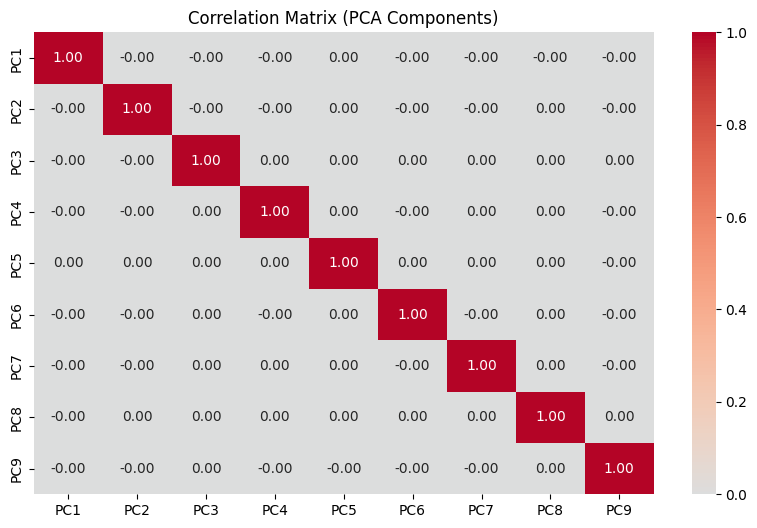

In [101]:
#correlation matrix of PCA 
plt.figure(figsize=(10, 6))
sns.heatmap(pca_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix (PCA Components)")
plt.show()

In [102]:
#KMeans Clustering on PCA components
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

pca_df['Cluster'] = clusters


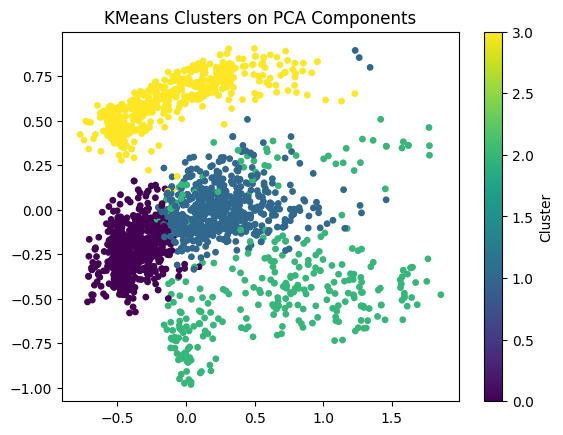

In [103]:
#Visualizing the clusters
plt.scatter(X_pca[:,0], X_pca[:,1], s=15, c=pca_df['Cluster'], cmap='viridis')
plt.title('KMeans Clusters on PCA Components')
plt.colorbar(label='Cluster')
plt.show()

In [104]:
#t-SNE implementation
from sklearn.manifold import TSNE

tsne_3d = TSNE(
    n_components=3,
    perplexity=30,
    learning_rate=200,
    random_state=42
)

X_tsne_3d = tsne_3d.fit_transform(normalized_data)
X_tsne_3d.shape


(2216, 3)

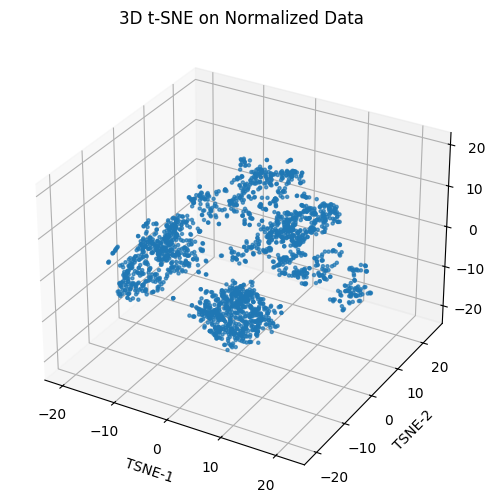

In [105]:
#plotting t-SNE components
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_tsne_3d[:,0],
    X_tsne_3d[:,1],
    X_tsne_3d[:,2],
    s=5,
    alpha=0.7
)

ax.set_xlabel("TSNE-1")
ax.set_ylabel("TSNE-2")
ax.set_zlabel("TSNE-3")
plt.title("3D t-SNE on Normalized Data")
plt.show()

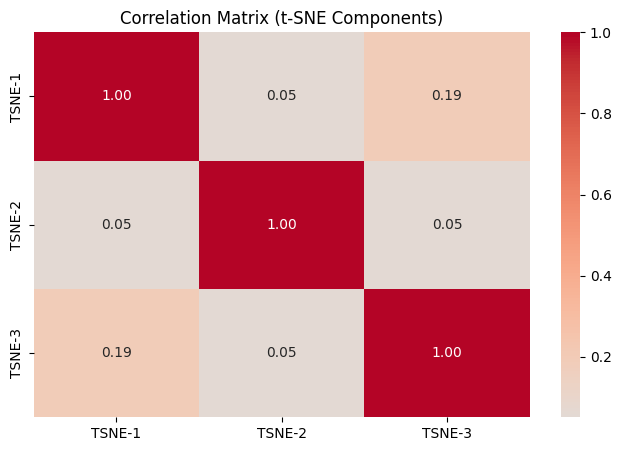

In [106]:
#correlation matrix of t-SNE components
plt.figure(figsize=(8, 5))
sns.heatmap(pd.DataFrame(X_tsne_3d, columns=['TSNE-1', 'TSNE-2', 'TSNE-3']).corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)       
plt.title("Correlation Matrix (t-SNE Components)")
plt.show()

In [107]:
#UMAP implementation
import umap

umap_3d = umap.UMAP(
    n_neighbors=15,   # try 10–50 to see what works best
    min_dist=0.1,     # smaller = tighter clusters
    n_components=3,   # 3D embedding
    random_state=42
)

X_umap_3d = umap_3d.fit_transform(normalized_data)
X_umap_3d.shape

/Users/shreyavats/Desktop/venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(2216, 3)

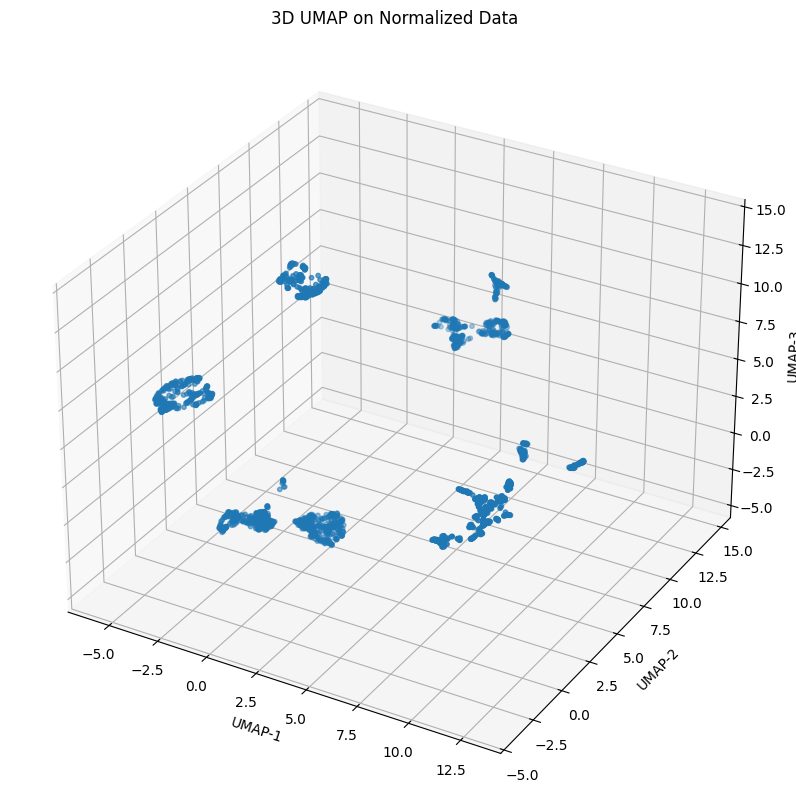

In [108]:
#plotting UMAP components
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_umap_3d[:, 0],
    X_umap_3d[:, 1],
    X_umap_3d[:, 2],
    s=10
)

ax.set_xlabel("UMAP-1")
ax.set_ylabel("UMAP-2")
ax.set_zlabel("UMAP-3")
plt.title("3D UMAP on Normalized Data")
plt.show()

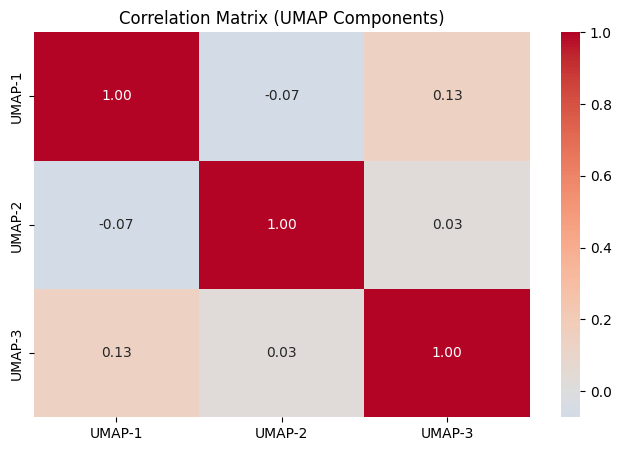

In [109]:
#correlation matrix of UMAP components
plt.figure(figsize=(8, 5))
sns.heatmap(pd.DataFrame(X_umap_3d, columns=['UMAP-1', 'UMAP-2', 'UMAP-3']).corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)       
plt.title("Correlation Matrix (UMAP Components)")
plt.show()

**Cluster-Based Feature Reduction (Feature Clustering)**

We will cluster features, not samples, using the correlation matrix of normalized data.

In [110]:
#STEP 1 — Compute Feature Similarity
import numpy as np
import pandas as pd

# feature correlation matrix
corr = normalized_data.corr().abs()

# convert to distance matrix
distance_matrix = 1 - corr

In [111]:
#STEP 2 — Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

# convert distance matrix to condensed form
dist_condensed = squareform(distance_matrix, checks=False)

# hierarchical clustering
Z = linkage(dist_condensed, method='ward')

In [112]:
#STEP 3 — Decide a Cluster Cut Threshold
cluster_threshold = 0.5   # can adjust 0.3–0.5
feature_clusters = fcluster(Z, t=cluster_threshold, criterion='distance')

In [113]:
#STEP 4 — Create DataFrame with Feature Clusters
clusters = pd.DataFrame({
    "Feature": normalized_data.columns,
    "Cluster": feature_clusters
})
clusters

,Feature,Cluster
0,Year_Birth,14
1,Education,15
2,Marital_Status,18
3,Income,6
4,Kidhome,2
5,Teenhome,12
6,Recency,16
7,MntWines,1
8,MntFruits,4
9,MntMeatProducts,5


In [114]:
#STEP 5 — Identify Representative Features
# correlations (absolute) computed earlier
corr = normalized_data.corr().abs()

best_features = []

for clust in clusters["Cluster"].unique():
    feats = clusters[clusters["Cluster"] == clust]["Feature"]
    
    # mean correlation of each feature with others in the same cluster
    sub_corr = corr.loc[feats, feats].mean().sort_values(ascending=False)
    
    # best representative feature = highest mean corr
    best_features.append(sub_corr.index[0])

best_features

['Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFishProducts',
 'MntMeatProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

In [115]:
#STEP 6 — Build the Reduced Dataset
cluster_reduced_data = normalized_data[best_features]
cluster_reduced_data.shape

(2216, 19)

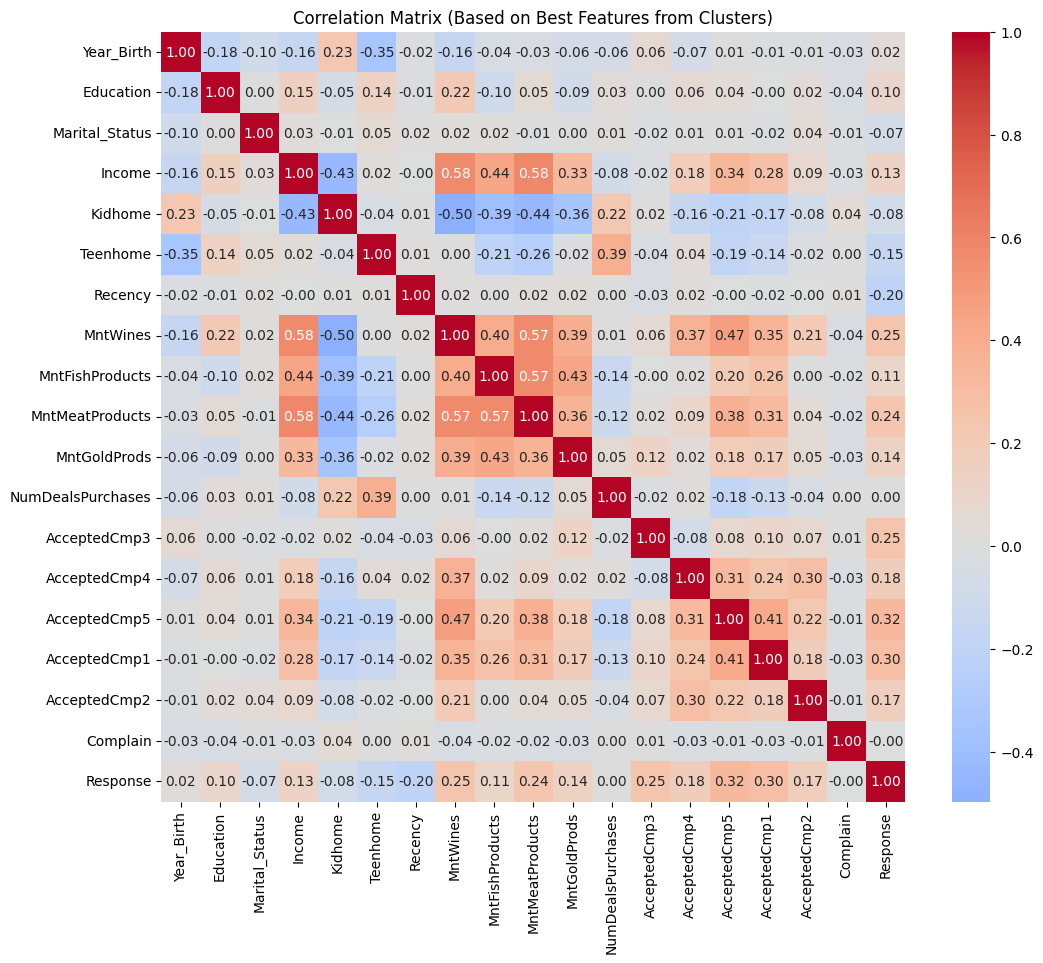

In [116]:
#correlation matrix of cluster reduced data
corr_cluster_reduced = cluster_reduced_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_cluster_reduced, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix (Based on Best Features from Clusters)")
plt.show()

In [117]:
#feature with highest variance inside each cluster
variances = normalized_data.var()

representative_features = clusters.groupby("Cluster")["Feature"] \
                                  .apply(lambda group: variances[group].idxmax())

representative_features = list(representative_features)
representative_features


['NumStorePurchases',
 'Kidhome',
 'MntGoldProds',
 'MntFishProducts',
 'MntMeatProducts',
 'NumWebVisitsMonth',
 'AcceptedCmp4',
 'AcceptedCmp2',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'Response',
 'Teenhome',
 'NumDealsPurchases',
 'Year_Birth',
 'Education',
 'Recency',
 'AcceptedCmp3',
 'Marital_Status',
 'Complain']

In [118]:
cluster_reduced_data_2 = normalized_data[representative_features]
cluster_reduced_data_2.shape

(2216, 19)

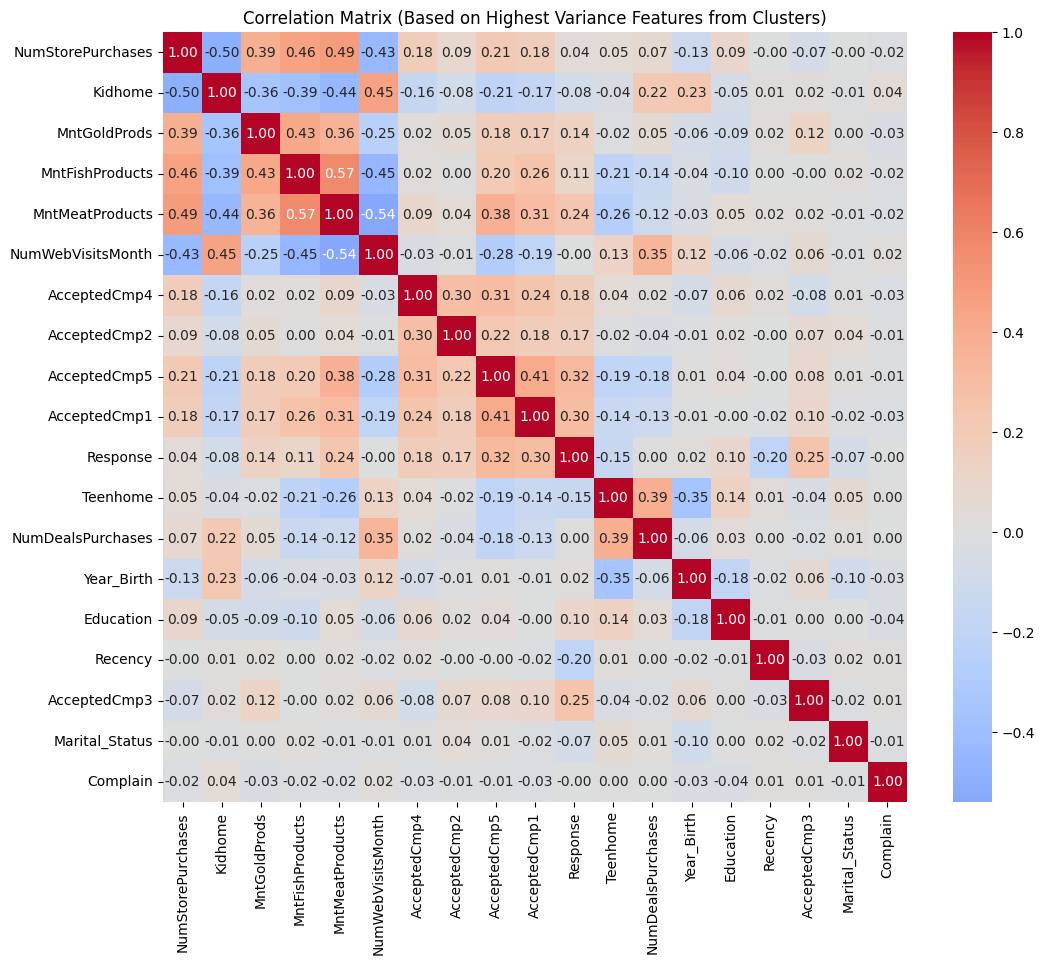

In [121]:
#coorrelation matrix of cluster reduced data
corr_cluster_reduced_2 = cluster_reduced_data_2.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_cluster_reduced_2, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix (Based on Highest Variance Features from Clusters)")
plt.show()

In [120]:
import numpy as np
import pandas as pd

def summarize_corr_matrix(corr_df, algo_name):
    # Take absolute correlations
    c = corr_df.abs().values
    
    # Mask diagonal (self-correlation = 1)
    n = c.shape[0]          # 2216
    off_diag = c[~np.eye(n, dtype=bool)]
    
    return {
        "Algorithm": algo_name,
        "n_features": n,
        "mean_abs_corr_offdiag": off_diag.mean(),
        "max_abs_corr_offdiag": off_diag.max()
    }

summaries = []
summaries.append(summarize_corr_matrix(varience_thresholded_df.corr(), "Varience Thresholding"))
summaries.append(summarize_corr_matrix(corr_filtered_data.corr(), "Correlation Filter - 0.2"))
summaries.append(summarize_corr_matrix(corr_filtered_data_2.corr(), "Correlation Filter - 0.5"))
summaries.append(summarize_corr_matrix(corr_filtered_data_3.corr(), "Correlation Filter - 0.7"))
summaries.append(summarize_corr_matrix(cluster_reduced_data.corr(), "Cluster-Based Reduction - Best Features"))
summaries.append(summarize_corr_matrix(cluster_reduced_data_2.corr(), "Cluster-Based Reduction - Highest Variance Features"))

summary_df = pd.DataFrame(summaries)
summary_df

,Algorithm,n_features,mean_abs_corr_offdiag,max_abs_corr_offdiag
0,Varience Thresholding,16,0.165271,0.640012
1,Correlation Filter - 0.2,8,0.055805,0.350791
2,Correlation Filter - 0.5,18,0.108745,0.553088
3,Correlation Filter - 0.7,24,0.163735,0.640012
4,Cluster-Based Reduction - Best Features,19,0.128919,0.584633
5,Cluster-Based Reduction - Highest Variance Fea...,19,0.119824,0.573574
